c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step


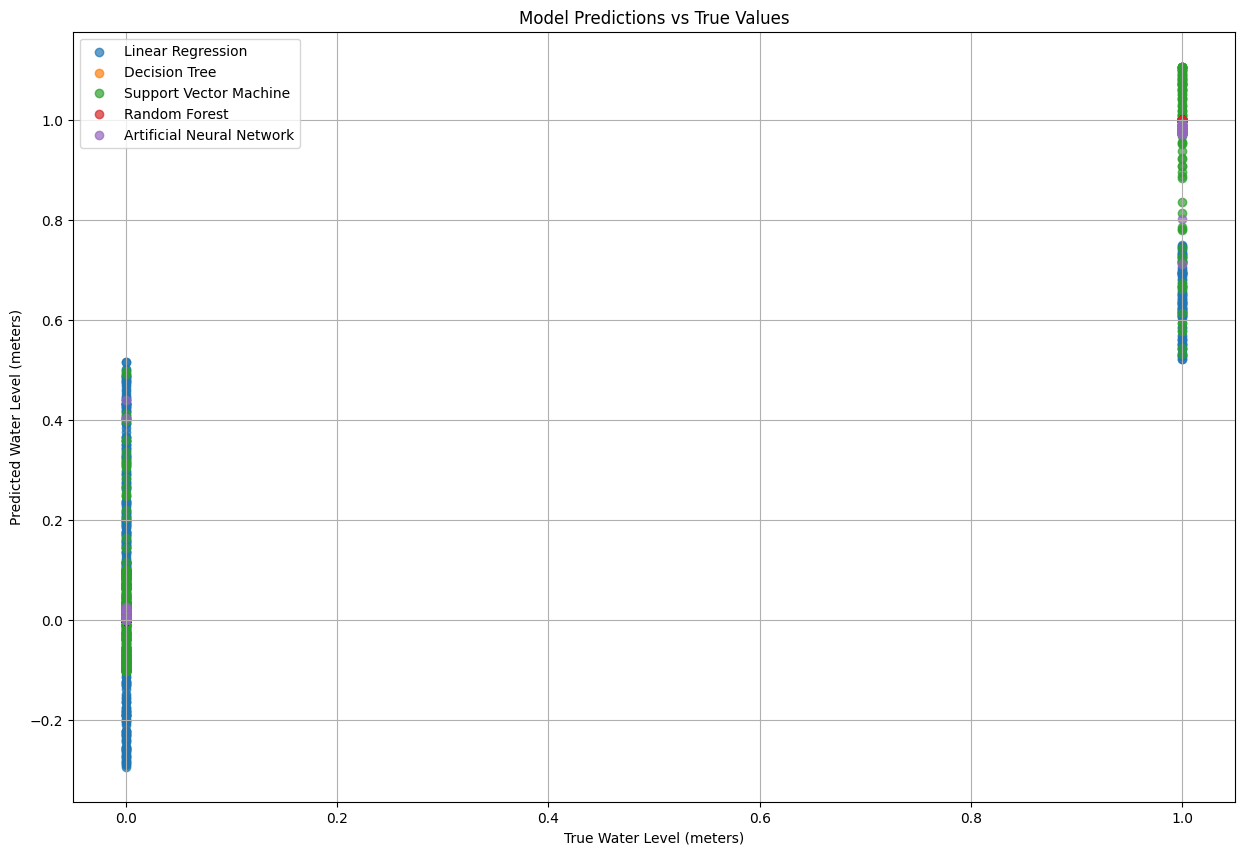

Mean Squared Error for each model:
Linear Regression: 0.07722047337174427
Decision Tree: 0.0
Support Vector Machine: 0.014384655253798112
Random Forest: 2.3809523809523854e-07
Artificial Neural Network: 0.0012889813068804386


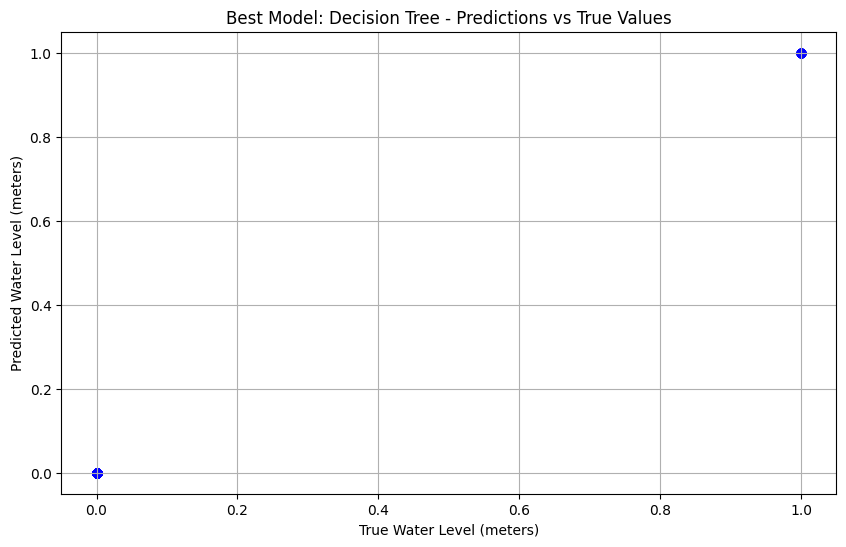

,Actual,Predicted
0,1,1.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,1,1.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/river_water_levels_flooding_train_data.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
X = df[['Hourly Water Level (meters)']]
y = df['Flood Indicator']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Artificial Neural Network': Sequential([
        Dense(64, input_dim=1, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
}

# Compile the Neural Network model
models['Artificial Neural Network'].compile(optimizer='adam', loss='mean_squared_error')

# Train and evaluate models
results = {}
for model_name, model in models.items():
    if model_name == 'Artificial Neural Network':
        # Train Neural Network
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
        y_pred = model.predict(X_test_scaled).flatten()
    else:
        # Train other models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]

# Plot the results for each model
plt.figure(figsize=(15, 10))
for model_name, model in models.items():
    if model_name == 'Artificial Neural Network':
        y_pred = model.predict(X_test_scaled).flatten()
    else:
        y_pred = model.predict(X_test_scaled)
    
    plt.scatter(y_test, y_pred, alpha=0.7, label=model_name)

plt.xlabel('True Water Level (meters)')
plt.ylabel('Predicted Water Level (meters)')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.grid(True)
plt.show()

# Print accuracies of each model
print("Mean Squared Error for each model:")
for model_name, mse in results.items():
    print(f"{model_name}: {mse}")

# Final visualization of the best model
if best_model_name == 'Artificial Neural Network':
    y_pred_best = best_model.predict(X_test_scaled).flatten()
else:
    y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7, color='blue')
plt.xlabel('True Water Level (meters)')
plt.ylabel('Predicted Water Level (meters)')
plt.title(f'Best Model: {best_model_name} - Predictions vs True Values')
plt.grid(True)
plt.show()

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best.flatten()
}).reset_index(drop=True)

# Display the first 20 rows of the comparison DataFrame
comparison_df.head(20)

c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
Training and Testing Accuracy for each model:
Logistic Regression - Training Accuracy: 99.82%, Testing Accuracy: 100.00%
Decision Tree - Training Accuracy: 100.00%, Testing Accuracy: 100.00%
Support Vector Machine - Training Accuracy: 99.94%, Testing Accuracy: 100.00%
Random Forest - Training Accuracy: 100.00%, Testing Accuracy: 100.00%
Artificial Neural Network - Training Accuracy: 99.70%, Testing Accuracy: 99.52%


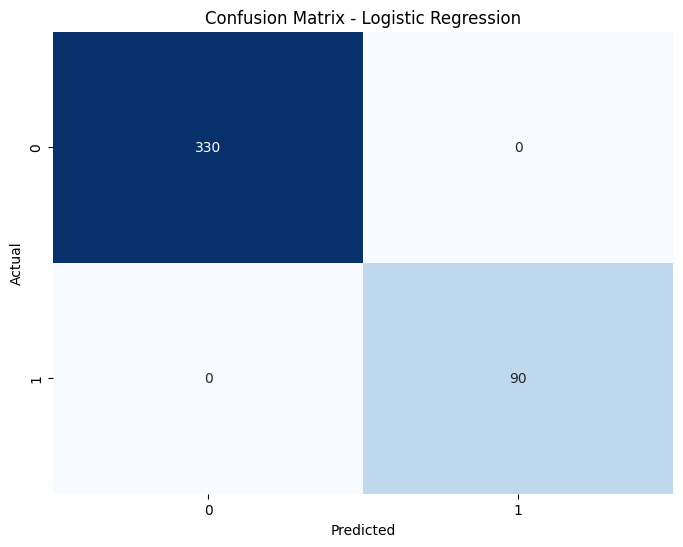

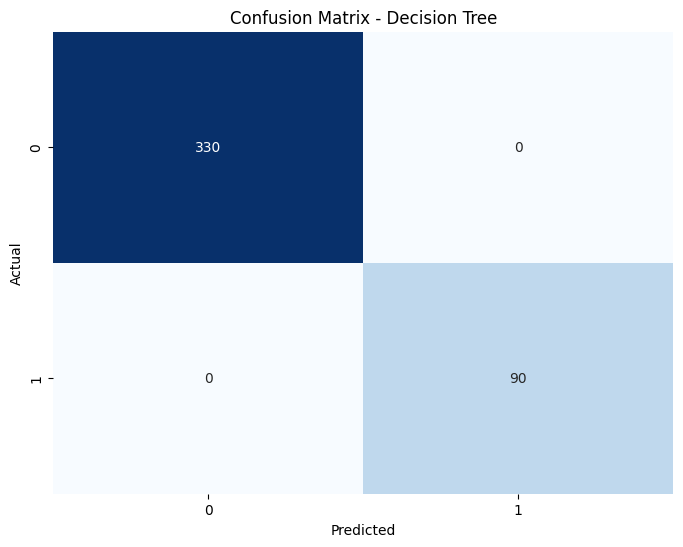

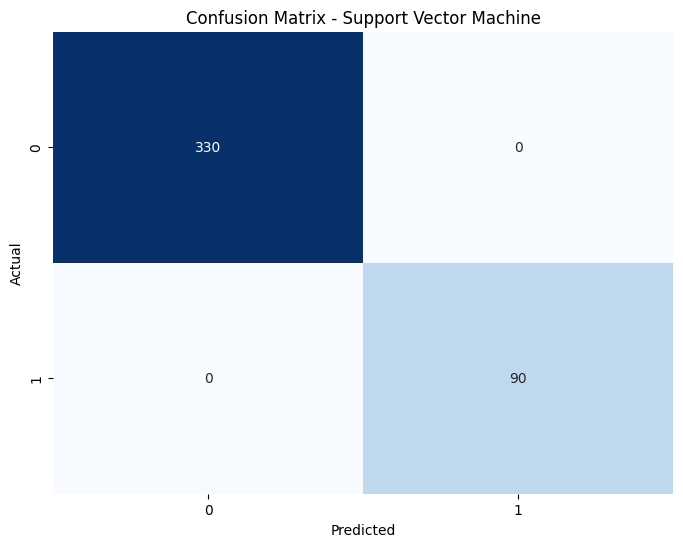

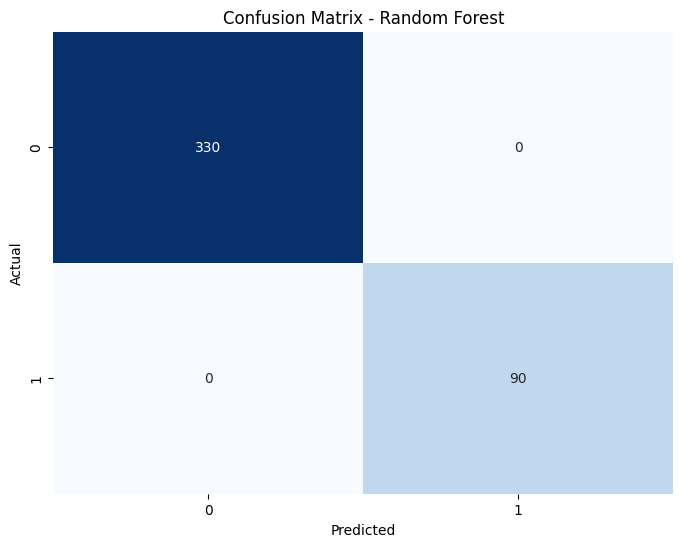

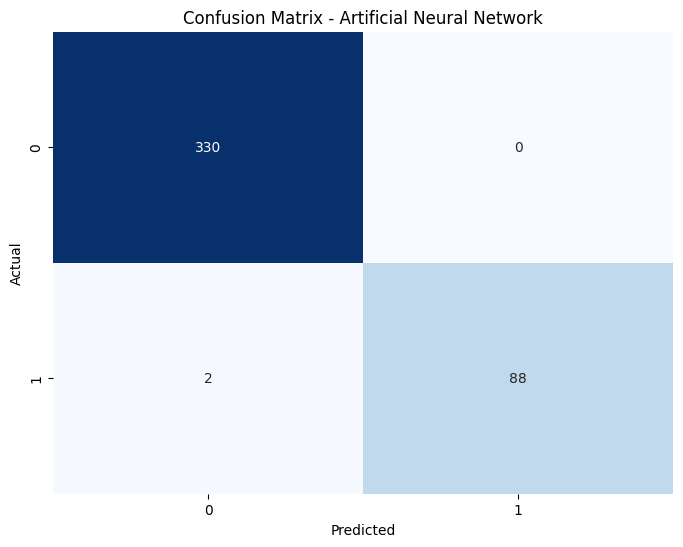

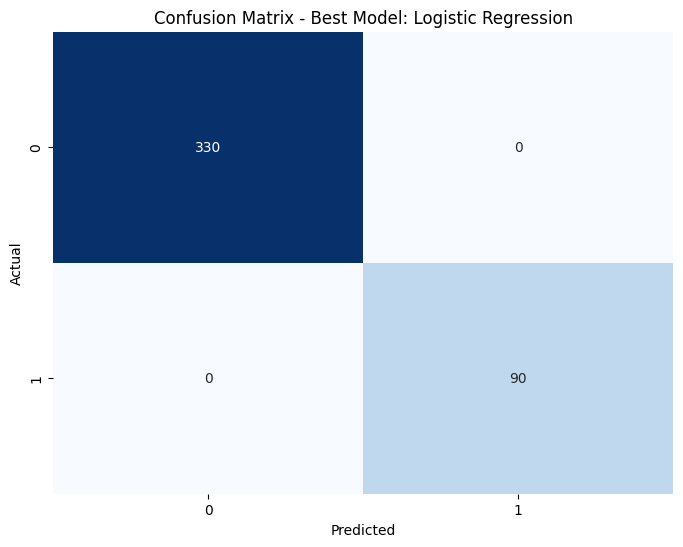

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/river_water_levels_flooding_train_data.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
X = df[['Hourly Water Level (meters)']]
y = df['Flood Indicator']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Artificial Neural Network': Sequential([
        Dense(64, input_dim=1, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

# Compile the Neural Network model
models['Artificial Neural Network'].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate models
results = {}
conf_matrices = {}
for model_name, model in models.items():
    if model_name == 'Artificial Neural Network':
        # Train Neural Network
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
        y_train_pred = (model.predict(X_train_scaled) > 0.5).astype(int)
        y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    else:
        # Train other models
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results[model_name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}
    conf_matrices[model_name] = confusion_matrix(y_test, y_test_pred)

# Select the best model based on test accuracy
best_model_name = max(results, key=lambda k: results[k]['test_accuracy'])
best_model = models[best_model_name]

# Print accuracies of each model
print("Training and Testing Accuracy for each model:")
for model_name, metrics in results.items():
    print(f"{model_name} - Training Accuracy: {metrics['train_accuracy'] * 100:.2f}%, Testing Accuracy: {metrics['test_accuracy'] * 100:.2f}%")

# Plot the confusion matrices for each model
for model_name, conf_matrix in conf_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Final visualization of the best model's confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrices[best_model_name], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Best Model: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual vs predicted values
if best_model_name == 'Artificial Neural Network':
    y_pred_best = (best_model.predict(X_test_scaled) > 0.5).astype(int)
else:
    y_pred_best = best_model.predict(X_test_scaled)

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best.flatten()
}).reset_index(drop=True)

# Display the first 20 rows of the comparison DataFrame
comparison_df.head(20)
